In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('D:/Ph.D Work/Ph.D Work Related/Datasets/crp.csv')
data.head()

,Crop,PlantCost,Yield,Pur_price,NetProfit
0,Rice,27400,37.5,1800,40100
1,Banana,50000,40.0,2000,30000
2,Turmeric,85000,38.0,3500,48000
3,ElephantfootYam,60000,31.0,4000,64000
4,Pigeon,18000,12.0,5000,42000


In [4]:
data.describe()

,PlantCost,Yield,Pur_price,NetProfit
count,19.000000,19.000000,19.000000,19.000000
mean,45969.421053,27.342105,3548.526316,37356.105263
std,29106.355269,18.523298,1640.291585,28153.428443
min,1000.000000,0.000000,1000.000000,0.000000
25%,22700.000000,8.500000,1900.000000,7500.000000
50%,50000.000000,31.000000,3710.000000,42000.000000
75%,67780.000000,43.500000,4511.000000,57215.500000
max,88394.000000,52.000000,6662.000000,79018.000000


In [5]:
import statsmodels.api as sm

# Select dependent and independent variables
X = data[['PlantCost','Yield','Pur_price']]  # independent variables
Y = data['NetProfit']  # dependent variable

# Add a constant to the independent variables
X = sm.add_constant(X)

# Create and fit the linear regression model
model = sm.OLS(Y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              NetProfit   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     10.63
Date:                Wed, 29 Mar 2023   Prob (F-statistic):           0.000531
Time:                        10:01:12   Log-Likelihood:                -210.28
No. Observations:                  19   AIC:                             428.6
Df Residuals:                      15   BIC:                             432.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.095e+04   9852.117     -1.112      0.2

C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Select dependent and independent variables
X = data[['PlantCost','Yield','Pur_price']]  # independent variables
Y = data['NetProfit']  # dependent variable

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Convert data to LightGBM format
train_data = lgb.Dataset(X_train, label=Y_train)
test_data = lgb.Dataset(X_test, label=Y_test)

# Set parameters for LightGBM model
params = {'objective': 'regression', 'metric': 'rmse'}

# Train the LightGBM model
model = lgb.train(params, train_data, valid_sets=[test_data])

# Make predictions on the test data
Y_pred = model.predict(X_test)

# Print the root mean squared error (RMSE) of the predictions
from sklearn.metrics import mean_squared_error
print('RMSE:', mean_squared_error(Y_test, Y_pred, squared=False))


[LightGBM] [Warning] There are no meaningful features, as all feature values are constant.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 15, number of used features: 0
[LightGBM] [Info] Start training from score 34077.933333
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[1]	valid_0's rmse: 26027.9
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[2]	valid_0's rmse: 26027.9
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[3]	valid_0's rmse: 26027.9
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[4]	valid_0's rmse: 26027.9
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[5]	valid_0's rmse: 26027.9
[LightGBM] [Warning] Stopped training because there are no more leaves t

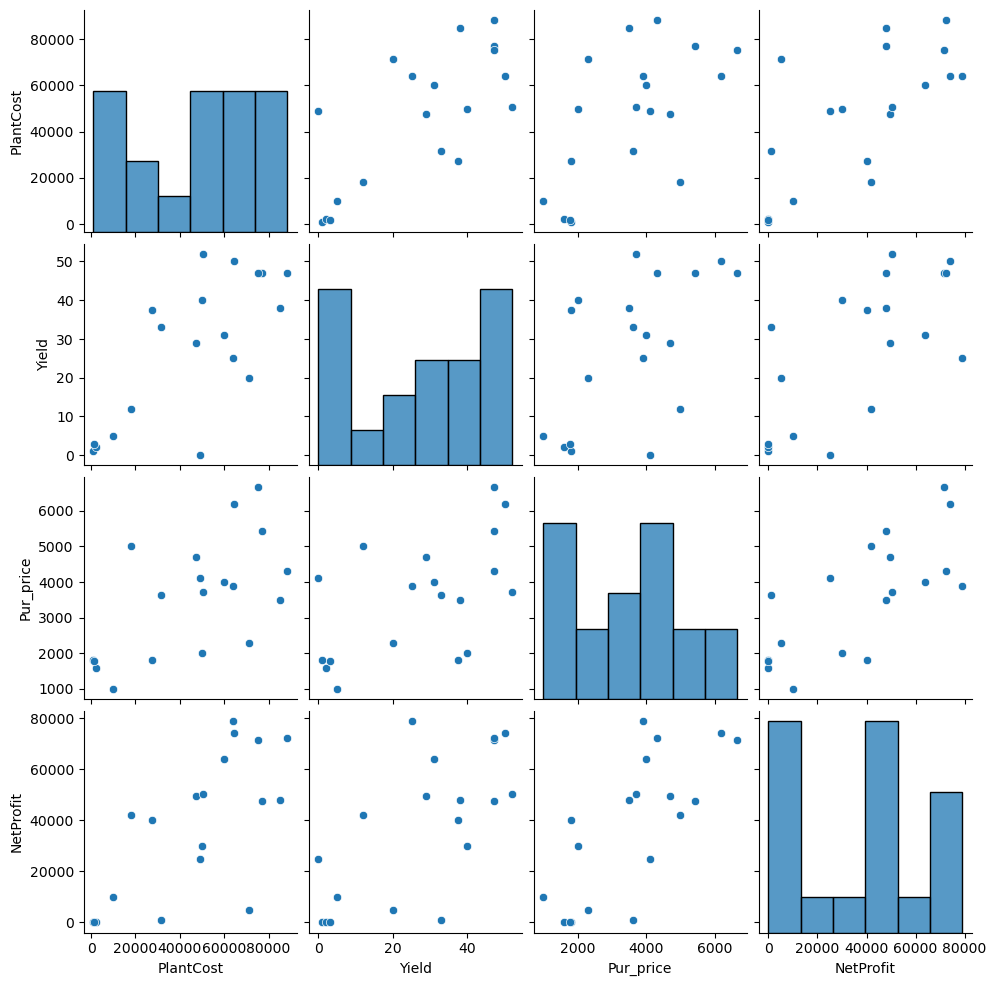

In [7]:
import pandas as pd
import seaborn as sns

# Load the dataset into a Pandas DataFrame
data = pd.read_csv('D:/Ph.D Work/Ph.D Work Related/Datasets/crp.csv')
# Select the columns to be plotted
cols_to_plot = ['PlantCost','Yield','Pur_price','NetProfit']

# Plot the pair plot using Seaborn
sns.pairplot(data[cols_to_plot])



Number of missing values:
 Crop         0
PlantCost    0
Yield        0
Pur_price    0
NetProfit    0
dtype: int64


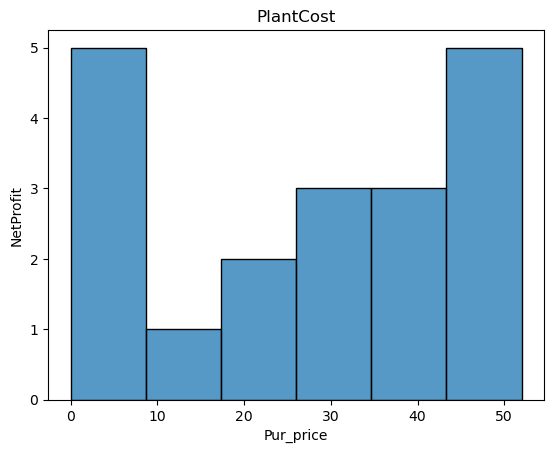

C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


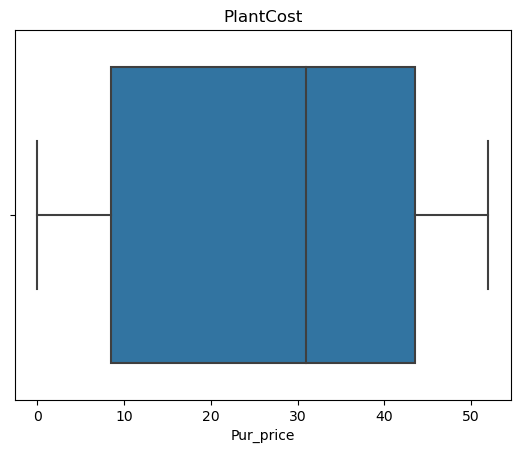

C:\Users\Srikanth.Mandela\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


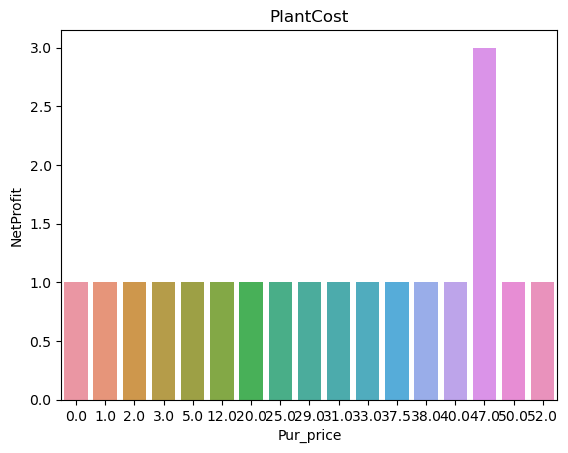

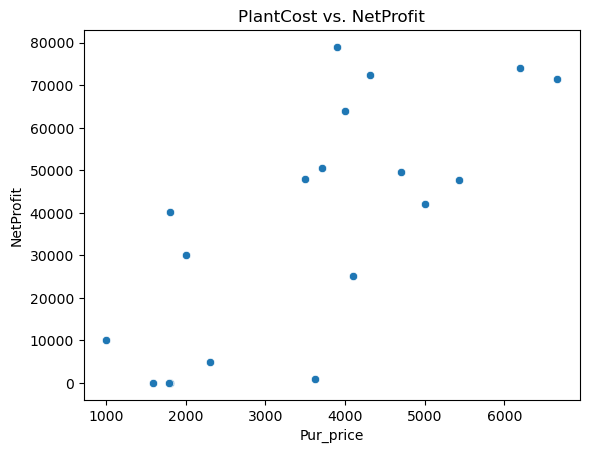

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('D:/Ph.D Work/Ph.D Work Related/Datasets/crp.csv')

print("Number of missing values:\n", data.isnull().sum())

sns.histplot(data['Yield'], kde=False)
plt.title('PlantCost')
plt.xlabel('Pur_price')
plt.ylabel('NetProfit')
plt.show()

sns.boxplot(data['Yield'])
plt.title('PlantCost')
plt.xlabel('Pur_price')
plt.show()

sns.countplot(data['Yield'])
plt.title('PlantCost')
plt.xlabel('Pur_price')
plt.ylabel('NetProfit')
plt.show()

sns.scatterplot(x='Pur_price', y='NetProfit', data=data)
plt.title('PlantCost vs. NetProfit')
plt.xlabel('Pur_price')
plt.ylabel('NetProfit')
plt.show()


In [21]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Load the data into a pandas dataframe
data = pd.read_csv('D:/Ph.D Work/Ph.D Work Related/Datasets/crp.csv')

# Split the data into features (X) and target (y)
X = data[['PlantCost','Yield','Pur_price']]  # independent variables
y = data['NetProfit']  # dependent variable

# Create a linear regression model and fit it to the data
model = LinearRegression()
model.fit(X, y)

# Print the coefficients (slope) of each feature
print(model.coef_)


[2.43995322e-01 4.13570798e+02 7.26607351e+00]


In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Generate a synthetic classification dataset
X, y = make_classification(random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train a logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}")


Precision: 1.00
Recall: 1.00
F1 score: 1.00


In [28]:
from metric_learn import LMNN
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Generate a toy dataset for classification
X, y = make_classification(n_samples=1000, n_classes=3, n_informative=10, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply LMNN to learn the Mahalanobis distance metric for k-NN classification
lmnn = LMNN(k=3, learn_rate=1e-6, max_iter=1000, verbose=1)
lmnn.fit(X_train, y_train)

# Get the learned Mahalanobis distance metric
metric = lmnn.get_metric()

# Use the learned metric to transform the training and testing data
X_train_transformed = X_train.dot(metric)
X_test_transformed = X_test.dot(metric)

# Train a k-NN classifier on the transformed training data
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_transformed, y_train)
from metric_learn import ITML

# Create an ITML object with the desired parameters
itml = ITML(num_constraints=200, verbose=True)

# Learn the distance metric from the training data
itml.fit(X_train, y_train)

# Transform the training and testing data using the learned metric
X_train_transformed = itml.transform(X_train)
X_test_transformed = itml.transform(X_test)


# Evaluate the performance of the classifier on the transformed testing data
accuracy = knn.score(X_test_transformed, y_test)
print("Accuracy: {:.2f}%".format(accuracy*100))


iter | objective | objective difference | active constraints | learning rate
2 46974.02748725713 -649.0877267255491 3276 1.0099999999999999e-06
3 46339.03622295979 -634.9912642973432 3261 1.0200999999999998e-06
4 45717.502272762475 -621.533950197314 3254 1.0303009999999997e-06
5 45108.72681874453 -608.7754540179449 3246 1.0406040099999998e-06
6 44512.11144911856 -596.6153696259717 3241 1.0510100500999999e-06
7 43926.71286103232 -585.3985880862383 3226 1.061520150601e-06
8 43351.367686765276 -575.3451742670441 3223 1.07213535210701e-06
9 42786.87420907029 -564.4934776949885 3215 1.08285670562808e-06
10 42230.89932336522 -555.9748857050654 3207 1.0936852726843608e-06
11 41683.57555176334 -547.3237716018848 3199 1.1046221254112045e-06
12 41144.73310235064 -538.8424494126957 3190 1.1156683466653166e-06
13 40613.59465818993 -531.1384441607079 3186 1.1268250301319698e-06
14 40089.3846423286 -524.2100158613321 3185 1.1380932804332895e-06
15 39572.73763779871 -516.647004529892 3190 1.149474213

TypeError: unsupported operand type(s) for *: 'float' and 'function'

In [30]:
import numpy as np
from scipy import stats

# define the data
crop = ['Rice', 'Banana', 'Turmeric', 'ElephantfootYam', 'Pigeon']
plant_cost = [27400, 50000, 85000, 60000, 18000]
yield_ = [37.5, 40.0, 38.0, 31.0, 12.0]
pur_price = [1800, 2000, 3500, 4000, 5000]
net_profit = [40100, 30000, 48000, 64000, 42000]

# perform the regression analysis
X = np.column_stack((plant_cost, yield_, pur_price))
Y = np.array(net_profit)
X = stats.zscore(X, ddof=1) # standardize the independent variables
Y = stats.zscore(Y, ddof=1) # standardize the dependent variable
X = np.column_stack((np.ones(len(X)), X)) # add intercept term
b = np.linalg.lstsq(X, Y, rcond=None)[0] # estimate the regression coefficients
mse = np.sum((Y - X @ b)**2) / (len(Y) - len(b)) # calculate the mean squared error
se = np.sqrt(np.diagonal(mse * np.linalg.inv(X.T @ X))) # calculate the standard errors
t = b / se # calculate the t-statistics
p = 2 * (1 - stats.t.cdf(np.abs(t), len(Y) - len(b))) # calculate the p-values
r2 = 1 - np.sum((Y - X @ b)**2) / np.sum((Y - np.mean(Y))**2) # calculate the coefficient of determination

# print the results
print('Dependent variable:', 'NetProfit')
print('Independent variables:', 'PlantCost, Yield, Pur_price')
print('Regression coefficients:', b[1:])
print('Intercept:', b[0])
print('Standard errors:', se)
print('t-statistics:', t)
print('p-values:', p)
print('Mean squared error:', mse)
print('Coefficient of determination (R^2):', r2)


Dependent variable: NetProfit
Independent variables: PlantCost, Yield, Pur_price
Regression coefficients: [-3.96685452  8.05949034  7.07111274]
Intercept: -1.6097303809493538e-18
Standard errors: [0.08967936 0.5960822  1.08436279 0.88400691]
t-statistics: [-1.79498434e-17 -6.65487829e+00  7.43246668e+00  7.99893381e+00]
p-values: [1.         0.09495171 0.0851426  0.07917729]
Mean squared error: 0.04021193368364821
Coefficient of determination (R^2): 0.9899470165790879
